umbralizacion con la tecnica de ISOdata

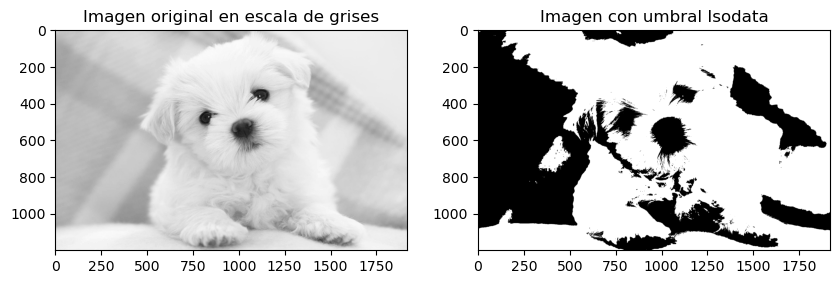

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def isodata(imagen):
    umbral = 100
    while True:
        grupo1 = imagen[imagen <= umbral]
        grupo2 = imagen[imagen > umbral]
        mediag1 = np.mean(grupo1)
        mediag2 = np.mean(grupo2)
        
        umbral_nuevo = (mediag1 + mediag2) / 2
        
        if abs(umbral_nuevo-umbral)<0.5:
            break
        umbral = umbral_nuevo
        
    return umbral

imagen= cv2.imread('perrito.jpg',0)

umbral_isodata= isodata(imagen)

_, imagen_isodata = cv2.threshold(imagen, umbral_isodata, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral Isodata')
plt.imshow(imagen_isodata, cmap='gray')

plt.show()

Tecnica de dos picos

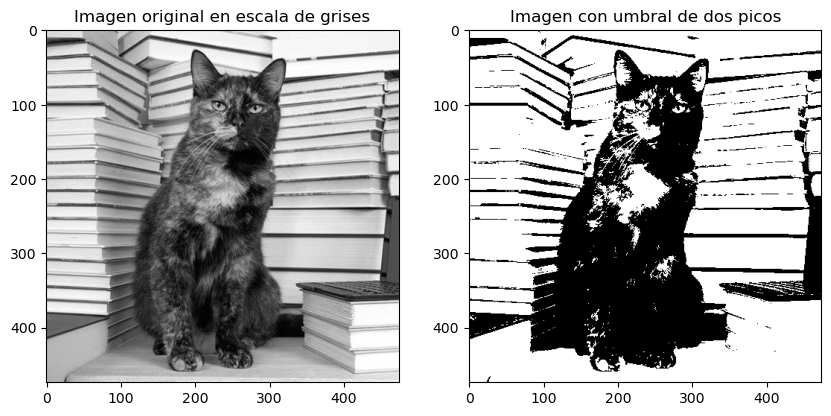

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dos_picos(imagen):
    hist = cv2.calcHist([imagen], [0], None, [256], [0, 150])
    pico = hist.flatten()
    pico_dif = np.diff(pico)
    primer_pico = np.argmax(pico_dif[:128])
    segundo_pico = np.argmax(pico_dif[128:]) + 128
    umbral_2picos = int((primer_pico + segundo_pico) / 2)
    return umbral_2picos

imagen = cv2.imread('gato.jpg', 0)
umbral_2pic = dos_picos(imagen)

_, imagen_2picos = cv2.threshold(imagen, umbral_2pic, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral de dos picos')
plt.imshow(imagen_2picos, cmap='gray')

plt.show()


Metodo de otsu


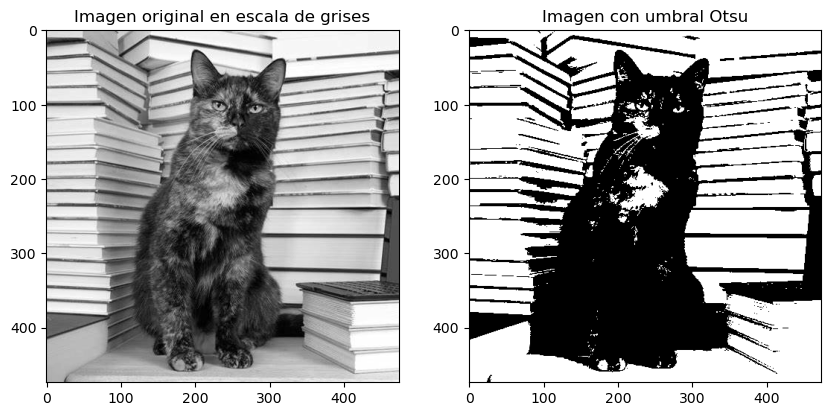

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('gato.jpg', 0)
_, imagen_otsu = cv2.threshold(imagen, 0, 180, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_image = np.where(imagen > imagen_otsu, 255, 0).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral Otsu')
plt.imshow(imagen_otsu, cmap='gray')

plt.show()


Umbralizacion variable- particion de una imagen



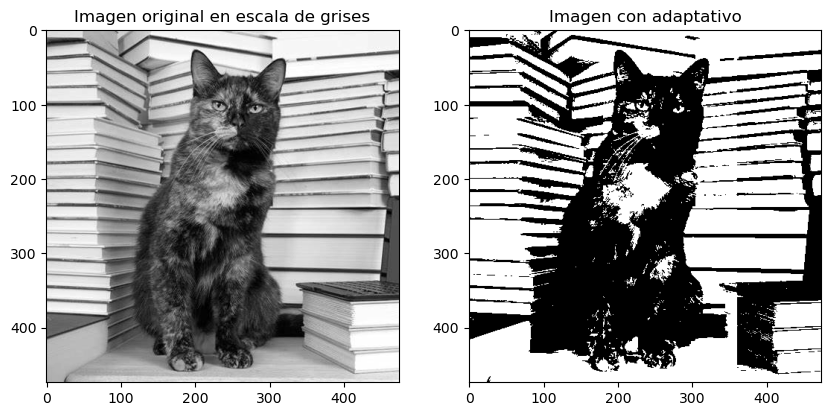

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def variable_umb_block(image, tam_bloq, c):
    umbral_img = np.zeros_like(image)
    for y in range(0, image.shape[0], tam_bloq):
        for x in range(0, image.shape[1], tam_bloq):
            bloque = image[y:y+tam_bloq, x:x+tam_bloq]
            bloque_media = np.mean(bloque)
            umbral_adap = bloque_media - c
            umbral_img[y:y+tam_bloq, x:x+tam_bloq] = (bloque > umbral_adap) * 255
    return umbral_img

imagen = cv2.imread('gato.jpg', 0)
tam_bloq = 180
c = 10
umbral_ima_adap = variable_umb_block(imagen, tam_bloq, c)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con adaptativo')
plt.imshow(umbral_ima_adap, cmap='gray')

plt.show()


Con desviacion

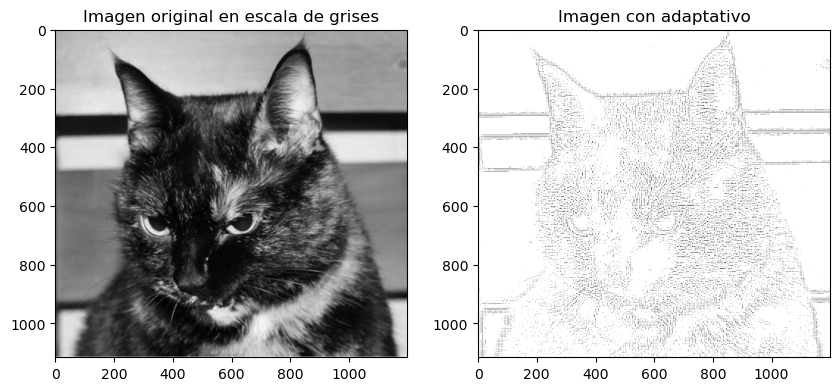

In [173]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def umbra_var2(image,tam_bloq,ajuste):
    umbral_img = np.zeros_like(image)
    for y in range(0, image.shape[0], tam_bloq):
        for x in range(0, image.shape[1], tam_bloq):
            bloque = image[y:y+tam_bloq, x:x+tam_bloq]
            bloque_media = np.mean(bloque)
            des=np.std(bloque)
            umbral_adap = bloque_media - (ajuste+des)
            umbral_img[y:y+tam_bloq, x:x+tam_bloq] = (bloque > umbral_adap) * 255
    return umbral_img


imagen = cv2.imread('gato2.jpg', 0)
tam_bloq = 5
c = 3
umbral_ima_adap = umbra_var2(imagen, tam_bloq, c)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con adaptativo')
plt.imshow(umbral_ima_adap, cmap='gray')

plt.show()

Adaptativa con ventana

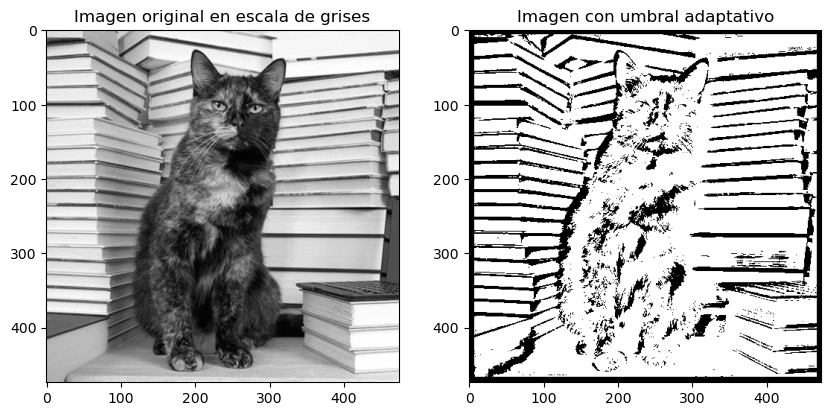

In [165]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ventana(imagen, ventana, factor):
    umbre_image = np.zeros_like(imagen)
    pad = ventana // 2
    padd_image = cv2.copyMakeBorder(imagen, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    for y in range(pad, imagen.shape[0] - pad):
        for x in range(pad, imagen.shape[1] - pad):
            ventana1 = padd_image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            media = np.mean(ventana1)
            dis = np.std(ventana1)
            umbral = media - (factor + dis)
            umbre_image[y, x] = 255 if imagen[y, x] > umbral else 0
    return umbre_image

imagen = cv2.imread('gato.jpg', 0)
tam_bloq = 15
c = 2
umbral = ventana(imagen, tam_bloq, c)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral adaptativo')
plt.imshow(umbral, cmap='gray')

plt.show()


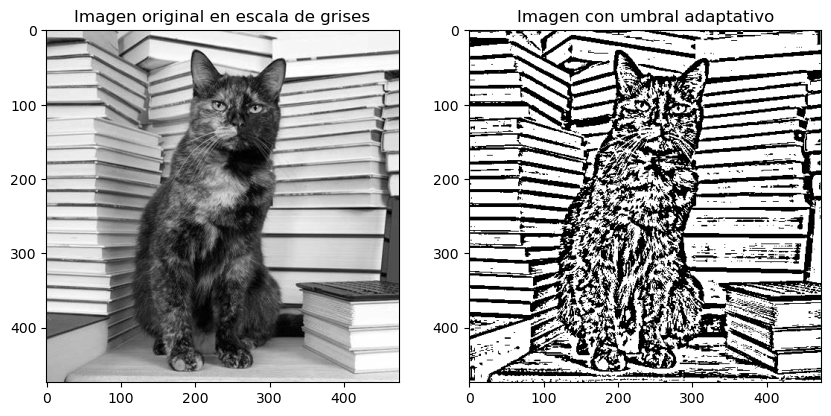

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('gato.jpg', 0)
ventana = 15
factor = 2
imagen_umbr = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, ventana, factor)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral adaptativo')
plt.imshow(imagen_umbr, cmap='gray')

plt.show()


Actividad Investigacion del metodo OTSU



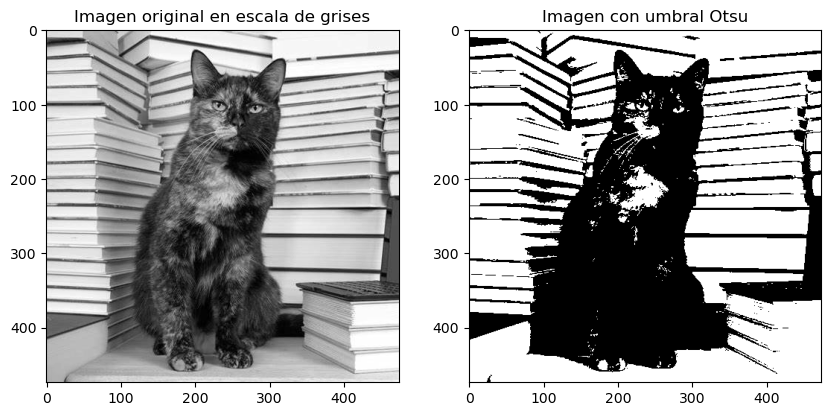

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def otsu(imagen):
    bins_num = 256
    hist, bin_edges = np.histogram(imagen, bins=bins_num)
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]

    mean1 = np.cumsum(hist * bin_mids) / weight1
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

    index_of_max_val = np.argmax(inter_class_variance)

    threshold = bin_mids[:-1][index_of_max_val]
    return threshold

imagen = cv2.imread('gato.jpg', 0)
umbral_otsu = otsu(imagen)

_, imagen_otsu = cv2.threshold(imagen, umbral_otsu, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen original en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Imagen con umbral Otsu')
plt.imshow(imagen_otsu, cmap='gray')

plt.show()
